In [2]:
import pandas                  as     pd
import matplotlib.pyplot       as     plt
import seaborn                 as     sns
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import StandardScaler 
from   sklearn.linear_model    import LinearRegression
from   sklearn.metrics         import mean_absolute_error
from   sklearn.tree            import DecisionTreeRegressor
from   sklearn.ensemble        import RandomForestRegressor
from   sklearn.svm             import SVR

# **Prédire le prix de l'action Tesla**

In [3]:
df = pd.read_csv('tesla_2014_2023.csv')

In [4]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
1,2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2,2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
3,2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
4,2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


In [5]:
df.isnull().sum()

date 0
open 0
high 0
low 0
close 0
volume 0
rsi_7 0
rsi_14 0
cci_7 0
cci_14 0
sma_50 0
ema_50 0
sma_100 0
ema_100 0
macd 0
bollinger 0
TrueRange 0
atr_7 0
atr_14 0
next_day_close 0
dtype: int64

In [6]:
df.shape

(2516, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2516 non-null   object 
 1   open            2516 non-null   float64
 2   high            2516 non-null   float64
 3   low             2516 non-null   float64
 4   close           2516 non-null   float64
 5   volume          2516 non-null   int64  
 6   rsi_7           2516 non-null   float64
 7   rsi_14          2516 non-null   float64
 8   cci_7           2516 non-null   float64
 9   cci_14          2516 non-null   float64
 10  sma_50          2516 non-null   float64
 11  ema_50          2516 non-null   float64
 12  sma_100         2516 non-null   float64
 13  ema_100         2516 non-null   float64
 14  macd            2516 non-null   float64
 15  bollinger       2516 non-null   float64
 16  TrueRange       2516 non-null   float64
 17  atr_7           2516 non-null   f

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
date,,,,,,,,,,,,,,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667
2014-01-03,10.000000,10.146000,9.906667,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000
2014-01-06,10.000000,10.026667,9.682667,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333
2014-01-07,9.841333,10.026667,9.683333,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333
2014-01-08,9.923333,10.246667,9.917333,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333


## **Comment se comporte l'action Tesla ?**

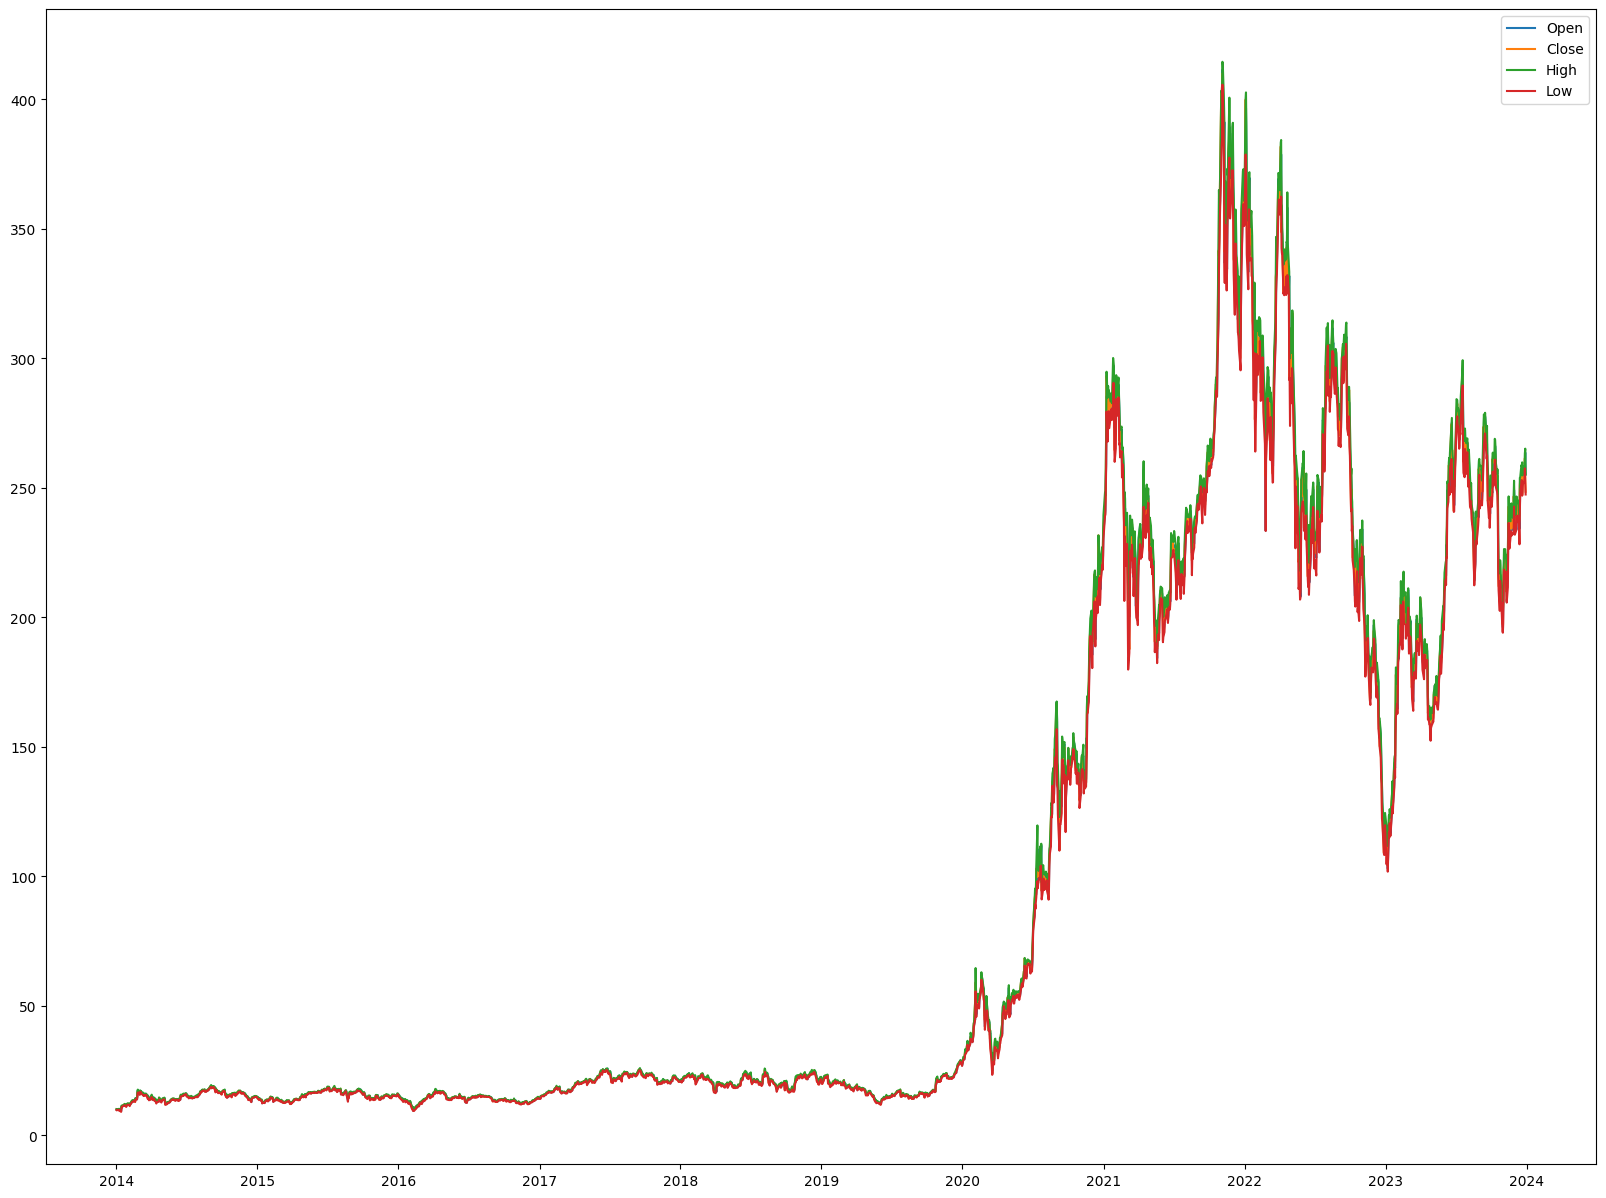

In [9]:
plt.figure(figsize=(20, 15))
plt.plot(df.index, df['open'], label='Open')
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['high'], label='High')
plt.plot(df.index, df['low'], label='Low')
plt.legend()

## **Quelle est la corélation de chaque colonne ?**
`next_day_close` est la colonne cible.

<Axes: >

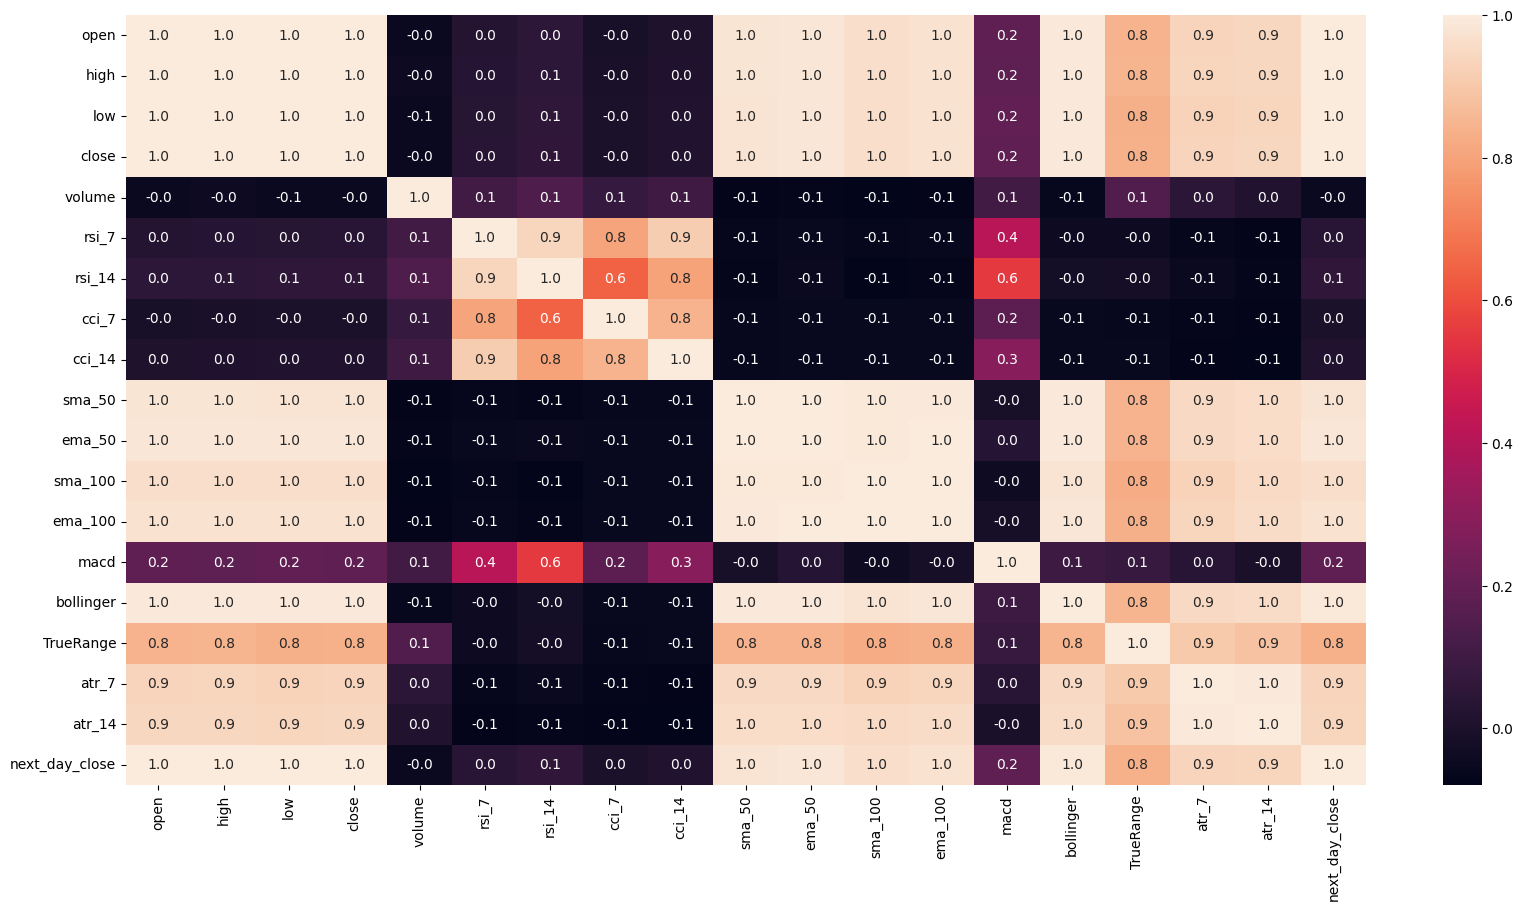

In [10]:
df_corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr, annot=True, fmt='.1f')

Son score est 100 %  avec `open`, `close`et `low`.  
Cest trois colonnes influences `next_day_close`.

### **Diviser l'ensemble en features et lavels**

In [11]:
y = df['next_day_close']
X = df.drop(columns='next_day_close')

### **Un ensemble pour l'entraînement, l'autre pour le test**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Normaliser l'esemble avant l'entraînement**

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((2012, 18), (504, 18))

### **Régression linéaire**

In [14]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_prediction = dtr.predict(X_test)
dtr_mae = mean_absolute_error(y_test, dtr_prediction)
dtr_mae

3.948502478174604

$ 3,94  
Ce n'est pas bien.

### **Régression Random Forest**

In [15]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_prediction = rfr.predict(X_test)
rfr_mae = mean_absolute_error(y_test, rfr_prediction)
rfr_mae

2.95773268829365

$ 2,95  
Mieux.

### **Régresseur Vecteur de support**

In [16]:
svr = SVR()
svr.fit(X_train, y_train)
svr_prediction = svr.predict(X_test)
svr_mae = mean_absolute_error(y_test, svr_prediction)
svr_mae

73.4951087602237

$ 73  
C'est très mauvais.

Le modèle de régression Random Forest est mieux.